# Upper Bound Theorem 2

In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
%config InlineBackend.figure_format = 'svg' # used to make plots look nicerbb

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  6.0, 0.0)
mdl.node('3',  12.0, 0.0)
mdl.node('4', 0.0, 8.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.truss('c', n['2'], n['4'])

mdl.fix(n['1'], ['x', 'y', 'rz'])
mdl.fix(n['3'], ['y'])
mdl.fix(n['4'], ['x','y', 'rz'])

mdl.numDOF()

[[6, 7, 8], [1, 2, 3], [4, 9, 5], [10, 11, 12]]

In [3]:
# Define plastic capacity
e['a'].Qp['+']['1'] = e['a'].Qp['-']['1'] = 500
e['a'].Qp['+']['2'] = e['a'].Qp['-']['2'] = 150
e['a'].Qp['+']['3'] = e['a'].Qp['-']['3'] = 150
e['c'].Qp['+']['1'] = e['c'].Qp['-']['1'] =  20
e['b'].Qp['+']['1'] = e['b'].Qp['-']['1'] = 500
e['b'].Qp['+']['2'] = e['b'].Qp['-']['2'] = 150
e['b'].Qp['+']['3'] = e['b'].Qp['-']['3'] = 150

In [4]:
em.analysis.characterize(mdl)

(0, 2)

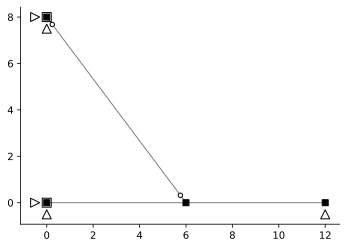

In [5]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)

In [6]:
A = em.A_matrix(mdl)
A.f

,$1$,$2$,$3$,$4$,$5$
$a_1$,1.0,0.000000,0.0,0.0,0.0
$a_2$,0.0,-0.166667,0.0,0.0,0.0
$a_3$,0.0,-0.166667,1.0,0.0,0.0
$b_1$,-1.0,-0.000000,0.0,1.0,0.0
$b_2$,-0.0,0.166667,1.0,0.0,0.0
$b_3$,-0.0,0.166667,0.0,0.0,1.0
$c_1$,0.6,-0.800000,0.0,0.0,0.0


### Vertical mechanism

In [7]:
n['2'].p['y'] = -50
n['3'].p['x'] =  0.
lambdac, Q = em.analysis.PlasticAnalysis_wLBT(mdl)
Q

,$Q_{{}}$
$a_1$,-12.0
$a_2$,150.0
$a_3$,150.0
$b_1$,0.0
$b_2$,-150.0
$b_3$,0.0
$c_1$,20.0


In [8]:
lambdac

1.82

In [9]:
B = em.B_matrix(mdl)
P = em.P_vector(B)
P.f

,$P_{{fffff}}$
$1$,0.0
$2$,-50.0
$3$,0.0
$4$,0.0
$5$,0.0


In [10]:
A.f@[0, 1,0, 0, 0]

,$Vector_{{fffff}}$
$a_1$,0.000000
$a_2$,-0.166667
$a_3$,-0.166667
$b_1$,0.000000
$b_2$,0.166667
$b_3$,0.166667
$c_1$,-0.800000


In [11]:
[0, 1,0, 0, 0]@P.f

C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.matvecs.P_vector'> (expected <class 'str'>) for object: P_vector(-50.)
  FormatterWarning


P_vector(-50.)

In [12]:
Qpl = em.Qpl_vector(mdl)[:,0]
Qpl

,0
0,500
1,150
2,150
3,500
4,150
5,150
6,20


In [13]:
np.abs(A.f@[0, 1,0, 0, 0])@np.abs(Q)

C:\Users\claud\Anaconda3\lib\site-packages\IPython\core\formatters.py:371: FormatterWarning: text/html formatter returned invalid type <class 'ema.utilities.Structural_Vector'> (expected <class 'str'>) for object: Structural_Vector(91.)
  FormatterWarning


Structural_Vector(91.)